# Linear regression with gradient descent

Using gradient descent to find the coefficients of a linear equation is not the best solution at all as the coefficient can be directly calculated with variance and covariance. Implementing it from scratch is just a way for me to better understand the gradient descent algorithm.

In [136]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import random

## Classic Gradient Descent

### Error function and gradient

In [140]:
# This is the Mean Squared Error (MSE) function that is used to compute the loss
def MSE(a,b,data):
    # E(a,b) = (y1 - (a*x1 +b))^2 + (y2 - (a*x2+b))^2 + ..... + (yN - (a*xN+b))^2
    sumError = 0
    for x,y in data: #x,y coordinates of the points
        sumError+=(y-(a*x+b))**2
    return sumError

# This is the gradient of the MSE function that is used to update the equation's coefficients (a and b)
def gradientMSE(a,b,data):
    # gradA = dE(a,b)/da = -2*x*(y-a*x+b)
    # gradB = dE(a,b)/db = -2*(y-a*x+b)
    gradientA = 0;
    gradientB = 0;
    for x,y in data:
        gradientA += -2*x*(y-(a*x+b))
        gradientB += -2*(y-(a*x+b))

    return np.array([gradientA,gradientB])

### Gradient Descent algorithm

In [139]:
# This is the classic gradient descent algorithm
def gradientDescent(MSE, gradientMSE,data, startingCoefficients, learningRate,nbEpochs):
    
    coefHistory = [] # Used to save the value of a and b at each iteration
    lossHistory = [] # Used to save the value of the loss at each iteration
    gradientHistory = [] # Used to save the value of the gradient at each iteration
    X = startingCoefficients # This is a tuple (a,b) with a and b the starting coefficients
    
    for i in range(nbEpochs):
            
        loss = MSE(*X,data) # Compute the loss thanks to the data and the coefficients a and b
        grad = gradientMSE(*X,data) # Compute the gradient 
        
        # Save the coefficients, loss and gradient of the current iteration (epoch) in the lists
        coefHistory.append(X)
        lossHistory.append(loss)
        gradientHistory.append(grad)
        
        X = X-learningRate*grad # Update the coefficients a and b 
        
    return coefHistory, lossHistory, gradientHistory

### Visualization

In [138]:
# This method show the evolution of the linear regression by displaying the lines made with the coefficients ax+b at each epoch on a graph
def showRegressionEvolution(coefHistory,data,xmin,xmax):
    VX = np.linspace(xmin,xmax)

    # Plot every line except the lasts one thanks to the coefficient a and b 
    for i in range(len(coefHistory)-1): 
        a,b = coefHistory[i]
        VY = a*VX+b
        plt.plot(VX,VY,color="red",alpha=0.15)
    
    # Plot the last line with the latest coeffcients in black 
    a,b = coefHistory[-1]
    VY = a*VX+b
    plt.plot(VX,VY,color="black")
    plt.title("Final equation :" + str(np.round(a,2)) + "*x + " + str(np.round(b,2)))

    # Plot the data points on the graph
    for x,y in data:
        plt.scatter(x,y,color="black")

    plt.xlabel("x")
    plt.ylabel("y")

    plt.show()

    
# This method show the evolution of the loss at each eopch on a graph 
def showLossEvolution(lossHistory,nbEpochs):
    VX = np.linspace(0,nbEpochs,nbEpochs)
    plt.plot(VX,lossHistory)
    
    plt.title("Loss evolution")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

# This method show the evolution of the coefficients (a and b) at each epoch on a graph
def showCoefficientsEvolution(coefHistory,nbEpochs):
    VX = np.linspace(0,nbEpochs,nbEpochs)

    curveA = [coef[0] for coef in coefHistory] # Take the first element of the tuples
    curveB = [coef[1] for coef in coefHistory] # Take the second element of the tuples

    plt.plot(VX,curveA,label="Coef a")
    plt.plot(VX,curveB,label="Coef b")
   
    plt.title("Coefficients evolution")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    
    plt.legend()
    plt.show()

### Process GD + Visualization

In [149]:
# This method use the gradient descent algorithm and display informations such as the loss evolution
def showGradientDescent(MSE, gradientMSE,data, startingCoefficients, learningRate,nbEpochs,xmin,xmax):
    # Gradient descent aglorithm
    coefHistory, lossHistory, gradientHistory = gradientDescent(MSE,gradientMSE,data,startingCoefficients,learningRate,nbEpochs)
    print("Trained for {} iterations :\n MSE at the last iteration : {}\n Gradients at the last iteration : {}\n Value of the parameters ax+b at the last iteration : {}x+{} ".format(nbEpochs,lossHistory[-1],gradientHistory[-1],coefHistory[-1][0],coefHistory[-1][1]))
    
    # Call the visualization methods
    showLossEvolution(lossHistory,nbEpochs)
    showCoefficientsEvolution(coefHistory,nbEpochs)
    showRegressionEvolution(coefHistory,data,xmin,xmax)

### Tests on data

#### Test 1 : 3 points

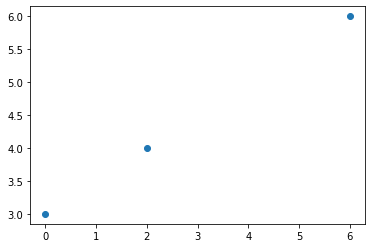

In [150]:
# Create data
data = [(0,3),(2,4),(6,6)] # Take 3 points on this line : y=1/2x + 3
x = [0,2,6]
y = [3,4,6]

# Choose parameters
startingCoefficients = (0,1)
learningRate = 0.02
nbEpochs=100

# Display the data
plt.scatter(x,y)
plt.show()

Trained for 100 iterations :
 MSE at the last iteration : 8.188069279254093e-05
 Gradients at the last iteration : [ 0.00425254 -0.02054807]
 Value of the parameters ax+b at the last iteration : 0.5015816262211173x+2.9923576524086295 


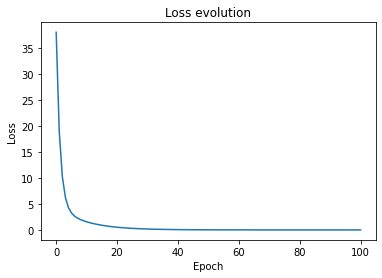

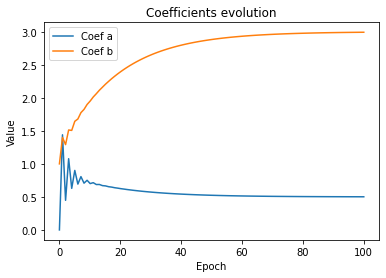

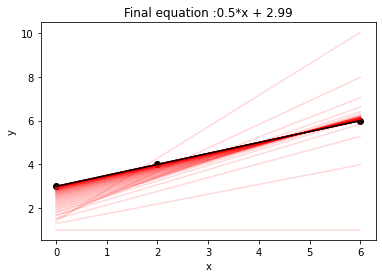

In [151]:
showGradientDescent(MSE,gradient_MSE,data,startingCoefficients,learningRate,nbEpochs,0,6)   

#### Test 2 : 30 points randomly distributed (with a gaussian N(0,3)) around y=2x-6

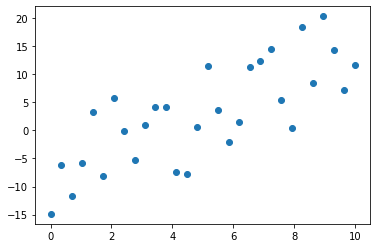

In [156]:
# Create data
f = lambda x : 2*x-6
X = np.linspace(0,10,30)
Y = [f(x) + random.gauss(0,5) for x in X] 
points = [(x,y) for x,y in zip(X,Y)]

# Choose parameters
startingCoefficients = (5,-5)
learningRate = 0.0001 # Very low learning rate to avoid divergence 
nbEpochs=3000

# Display the data
plt.scatter(X,Y)
plt.show()

Trained for 3000 iterations :
 MSE at the last iteration : 981.5473847015442
 Gradients at the last iteration : [-0.1053428   0.70897739]
 Value of the parameters ax+b at the last iteration : 2.242745139761921x+-8.176028937682428 


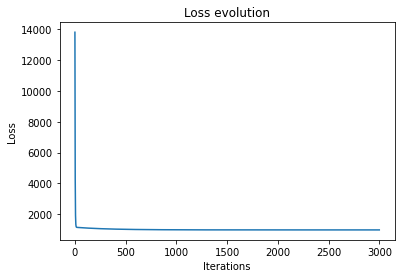

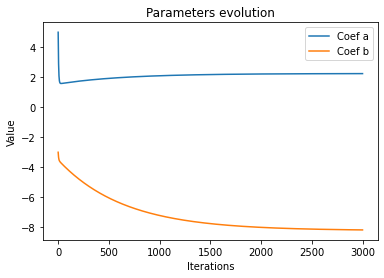

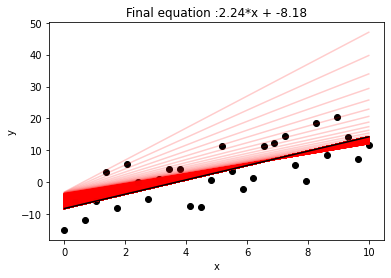

In [164]:
ProcessGradientDescent(MSE,gradient_MSE,points,(5,-3),learning_rate,nbIterations,0,10) 